In [1]:
import praw
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import datetime

In [2]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Step 1: Set up Reddit API credentials
reddit = praw.Reddit(client_id='7mbWV1ZILon_zKpU-eBX1Q', 
                     client_secret='0e5EHYQfIyNfZWijODKhyqYtW6twHA', 
                     user_agent='SentimentAnalysisApp')


In [4]:
# Step 2: Collect data from a subreddit (posts + comments)
subreddit = reddit.subreddit('example')  # Change 'example' to your subreddit of interest
posts_data = []
comments_data = []

In [5]:
# Collect top 100 posts (you can modify the number)
for post in subreddit.top(limit=100):
    # Collect post title and its sentiment
    post_data = {'Title': post.title, 'Timestamp': datetime.datetime.utcfromtimestamp(post.created_utc)}
    posts_data.append(post_data)
    
    # Collect comments in the post
    post.comments.replace_more(limit=0)  # This removes "MoreComments" objects
    for comment in post.comments.list():
        comment_data = {'Title': post.title, 'Comment': comment.body, 'Timestamp': datetime.datetime.utcfromtimestamp(comment.created_utc)}
        comments_data.append(comment_data)

In [6]:
# Step 3: Create a DataFrame from the collected posts and comments
posts_df = pd.DataFrame(posts_data)
comments_df = pd.DataFrame(comments_data)


In [7]:
# Step 4: Sentiment Analysis using TextBlob for posts and comments
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Sentiment polarity: -1 to 1
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

posts_df['Sentiment'] = posts_df['Title'].apply(analyze_sentiment)
comments_df['Sentiment'] = comments_df['Comment'].apply(analyze_sentiment)

In [8]:
# Step 5: Sentiment Breakdown
sentiment_counts = posts_df['Sentiment'].value_counts()
print("Sentiment Breakdown (Posts):")
print(sentiment_counts)

sentiment_counts_comments = comments_df['Sentiment'].value_counts()
print("Sentiment Breakdown (Comments):")
print(sentiment_counts_comments)


Sentiment Breakdown (Posts):
Sentiment
Neutral    4
Name: count, dtype: int64
Sentiment Breakdown (Comments):
Sentiment
Neutral     30
Negative     6
Positive     4
Name: count, dtype: int64


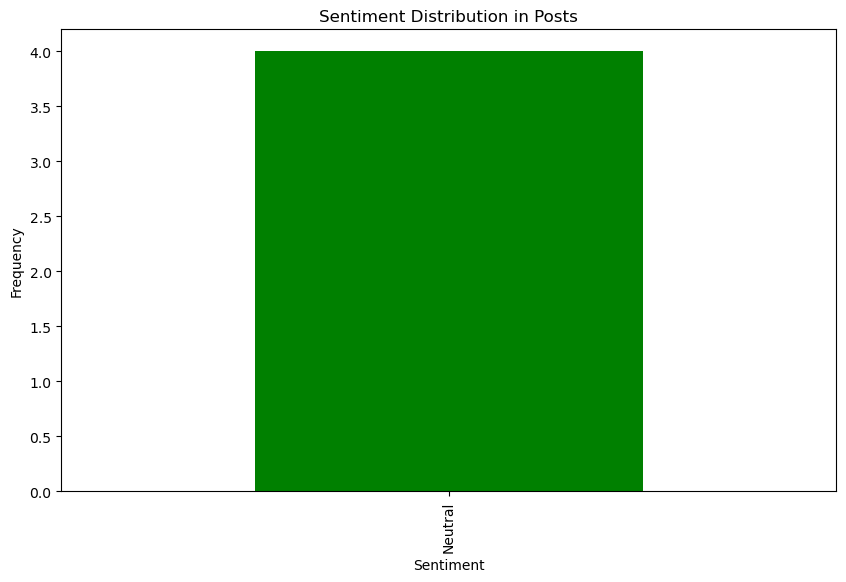

In [9]:
# Step 6: Visualiz Sentiment Distribution for Posts and Comments
plt.figure(figsize=(10, 6))
posts_df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Posts')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

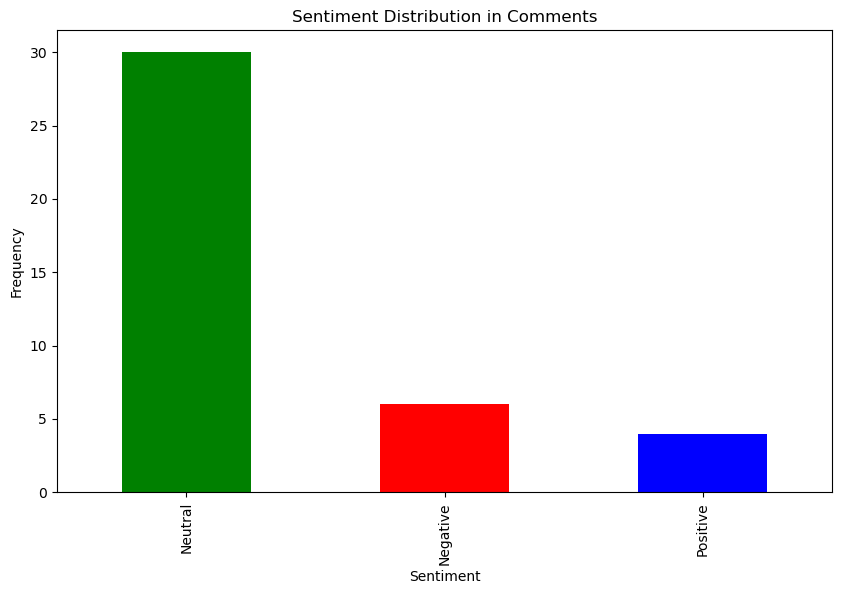

In [10]:
plt.figure(figsize=(10, 6))
comments_df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Step 7: Sentiment Trends Over Time
posts_df['Date'] = posts_df['Timestamp'].dt.date
comments_df['Date'] = comments_df['Timestamp'].dt.date

posts_sentiment_trend = posts_df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
comments_sentiment_trend = comments_df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

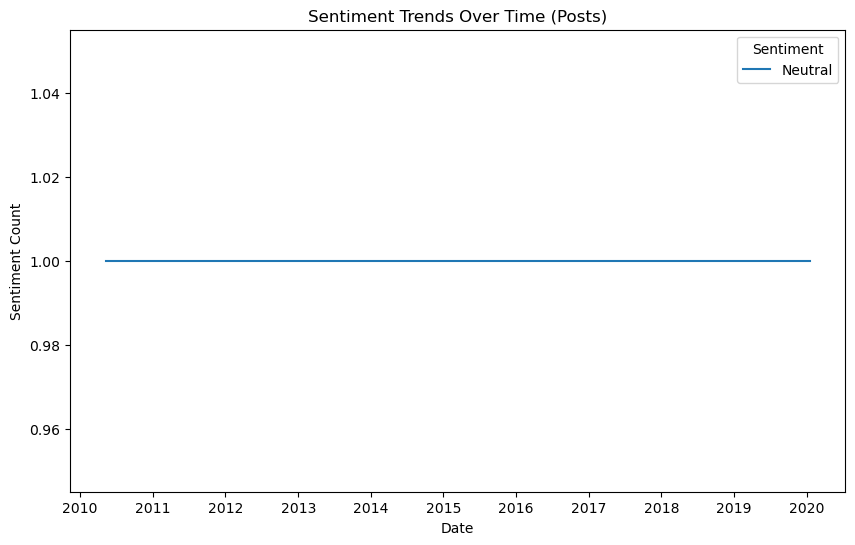

In [14]:
# Plotting sentiment trends for posts
posts_sentiment_trend.plot(kind='line', figsize=(10, 6), title='Sentiment Trends Over Time (Posts)')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.show()


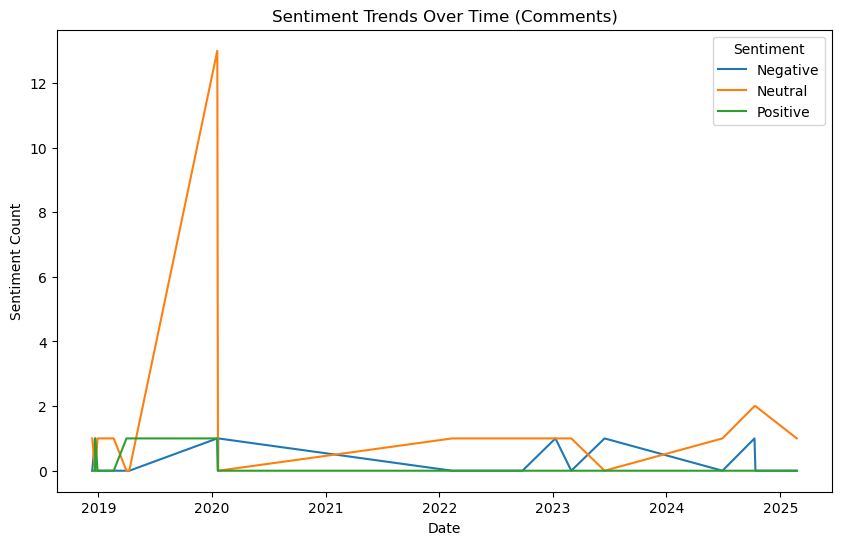

In [13]:
# Plotting sentiment trends for comments
comments_sentiment_trend.plot(kind='line', figsize=(10, 6), title='Sentiment Trends Over Time (Comments)')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.show()

In [15]:
# Step 8: Word Frequency Analysis
def preprocess_text(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_words)

posts_df['Cleaned_Title'] = posts_df['Title'].apply(preprocess_text)
comments_df['Cleaned_Comment'] = comments_df['Comment'].apply(preprocess_text)

all_posts_text = ' '.join(posts_df['Cleaned_Title'])
all_comments_text = ' '.join(comments_df['Cleaned_Comment'])

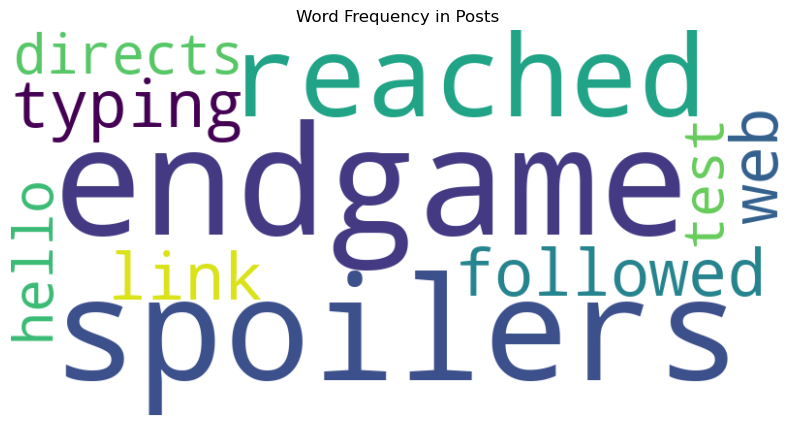

In [16]:
# WordCloud for posts
wordcloud_posts = WordCloud(width=800, height=400, background_color='white').generate(all_posts_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.title('Word Frequency in Posts')
plt.axis('off')
plt.show()

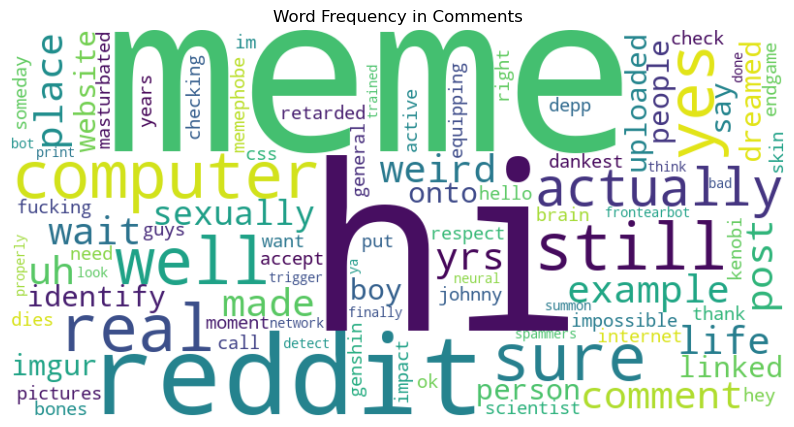

In [17]:
# WordCloud for comments
wordcloud_comments = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.title('Word Frequency in Comments')
plt.axis('off')
plt.show()